In [3]:
import sqlite3
import pandas as pd
%load_ext memory_profiler

conn = sqlite3.connect('../blood_donation.db')

def measure_query(query):
    # Measure the time it takes to execute the query
    time = %time pd.read_sql_query(query, conn)
    # Measure the memory usage of the query
    mem = %memit -o pd.read_sql_query(query, conn)
    return {'time': time, 'memory': mem}

# Example usage:
query = "SELECT * FROM appointment"
result = measure_query(query)
print(result)

CPU times: total: 0 ns
Wall time: 1.99 ms
peak memory: 124.76 MiB, increment: 0.02 MiB
{'time':    AppointmentID        Date     Status  DonorID  DonationCenterID  SlotID
0              1  2023-04-12    Pending        1                 2       3
1              2  2023-03-31  Confirmed        2                 4       6
2              3  2023-03-27  Cancelled        1                 3       5
3              4  2023-03-27  Cancelled        2                 2       8, 'memory': <memory_profiler.MemitResult object at 0x00000281FE47F400>}


In [4]:
query2 = "SELECT * FROM donation_center"
result2 = measure_query(query2)
print(result2)

CPU times: total: 0 ns
Wall time: 2.05 ms
peak memory: 124.93 MiB, increment: 0.00 MiB
{'time':    DonationCenterID                     Name  \
0                 1         BloodBank@Outram   
1                 2     BloodBank@DhobyGhaut   
2                 3      BloodBank@Woodlands   
3                 4  BloodBank@WestgateTower   

                                             Address  
0  Health Sciences Authority(Opposite Outram Park...  
1  Dhoby Ghaut MRT Station Dhoby Xchange (Near Ex...  
2  Woodlands Civic Centre(Opposite Causeway Point...  
3  Westgate Tower(Linked to Jurong East MRT Stati...  , 'memory': <memory_profiler.MemitResult object at 0x000002818EB30D60>}


In [5]:
query3 = "SELECT * FROM donations"
result3 = measure_query(query3)
print(result3)

CPU times: total: 0 ns
Wall time: 0 ns
peak memory: 124.98 MiB, increment: 0.01 MiB
{'time': Empty DataFrame
Columns: [DonationID, DonorID, DonationDate, Quantity, Location]
Index: [], 'memory': <memory_profiler.MemitResult object at 0x000002818E8720B0>}


In [6]:
query4 = "SELECT * FROM donors"
result4 = measure_query(query4)
print(result4)

CPU times: total: 0 ns
Wall time: 1.04 ms
peak memory: 125.01 MiB, increment: 0.00 MiB
{'time':    DonorID  UserID DonorName  DonorAge DonorGender  DonorWeight BloodType  \
0        1       1      test        60           M         57.0        O+   
1        2       2      test        25           F         13.0       AB+   

  DonorAddress DonorMedicalHistory  
0      address                None  
1     address2                   2  , 'memory': <memory_profiler.MemitResult object at 0x000002818EB320E0>}


In [7]:
query5 = "SELECT * FROM medical_conditions"
result5 = measure_query(query5)
print(result5)

CPU times: total: 0 ns
Wall time: 987 µs
peak memory: 125.05 MiB, increment: 0.01 MiB
{'time':    MedicalConditionID                       Name
0                   1               Aids and HIV
1                   2                     Asthma
2                   3                 Babesiosis
3                   4  Blood disease or disorder
4                   5          Caesarean Section
5                   6                   Diabetes
6                   7                   Epilepsy
7                   8                       Fits
8                   9          Haemoglobin level
9                  10                   Syphilis, 'memory': <memory_profiler.MemitResult object at 0x000002818EB019F0>}


In [8]:
query6 = "SELECT * FROM roles"
result6 = measure_query(query6)
print(result6)

CPU times: total: 0 ns
Wall time: 997 µs
peak memory: 125.06 MiB, increment: 0.00 MiB
{'time':    RoleID RoleName
0       1    Donor
1       2    Staff, 'memory': <memory_profiler.MemitResult object at 0x000002818EBA44C0>}


In [9]:
query7 = "SELECT * FROM slots"
result7 = measure_query(query7)
print(result7)

CPU times: total: 0 ns
Wall time: 1.2 ms
peak memory: 125.09 MiB, increment: 0.01 MiB
{'time':     SlotID StartTime   EndTime  Max_Bookings  Booked_Count  DonationCenterID
0        1  09:00:00  10:00:00             5             0                 1
1        2  10:00:00  11:00:00             5             0                 1
2        3  11:00:00  12:00:00             5             0                 1
3        4  12:00:00  13:00:00             5             0                 1
4        5  13:00:00  14:00:00             5             0                 1
5        6  14:00:00  15:00:00             5             0                 1
6        7  15:00:00  16:00:00             5             0                 1
7        8  16:00:00  17:00:00             5             0                 1
8        9  09:00:00  10:00:00             5             0                 2
9       10  10:00:00  11:00:00             5             0                 2
10      11  11:00:00  12:00:00             5             0

In [10]:
query8 = "SELECT * FROM staff"
result8 = measure_query(query8)
print(result8)

CPU times: total: 0 ns
Wall time: 1.99 ms
peak memory: 125.14 MiB, increment: 0.00 MiB
{'time':    StaffID      Name             Email   Password Role  DonationCenterID
0        1  ZhengWei  staff1@gmail.com  password1    2                 1
1        2      John  staff2@gmail.com  password2    2                 2
2        3      Mary  staff3@gmail.com  password3    2                 3
3        4    Daniel  staff4@gmail.com  password4    2                 4, 'memory': <memory_profiler.MemitResult object at 0x000002818EB88D60>}


In [11]:
query9 = "SELECT * FROM users"
result9 = measure_query(query9)
print(result9)

CPU times: total: 15.6 ms
Wall time: 997 µs
peak memory: 125.15 MiB, increment: 0.01 MiB
{'time':    UserID  Name             Email     Phone  \
0       1  test  abc123@gmail.com  12345678   
1       2  test     test@test.com  12345678   

                                            Password Role  
0  b'$2b$12$B3kx1G7tf8aO29dw1CjkBOjbIEpa3SyALGRB7...    1  
1  b'$2b$12$fMH316DoxYCYVt7h6KE51uYhsHb7qdeSzH5Qt...    1  , 'memory': <memory_profiler.MemitResult object at 0x0000028191B36FE0>}


In [12]:
query10 = "SELECT appointment.Date, slots.StartTime, slots.EndTime, donation_center.Name FROM appointment INNER JOIN Slots ON appointment.SlotID = slots.SlotID INNER JOIN donation_center ON appointment.DonationCenterID = donation_center.DonationCenterID WHERE slots.Booked_Count < slots.Max_Bookings"
result10 = measure_query(query10)
print(result10)

CPU times: total: 0 ns
Wall time: 998 µs
peak memory: 125.18 MiB, increment: 0.01 MiB
{'time':          Date StartTime   EndTime                     Name
0  2023-04-12  11:00:00  12:00:00     BloodBank@DhobyGhaut
1  2023-03-31  14:00:00  15:00:00  BloodBank@WestgateTower
2  2023-03-27  13:00:00  14:00:00      BloodBank@Woodlands
3  2023-03-27  16:00:00  17:00:00     BloodBank@DhobyGhaut, 'memory': <memory_profiler.MemitResult object at 0x000002818EB4BF70>}


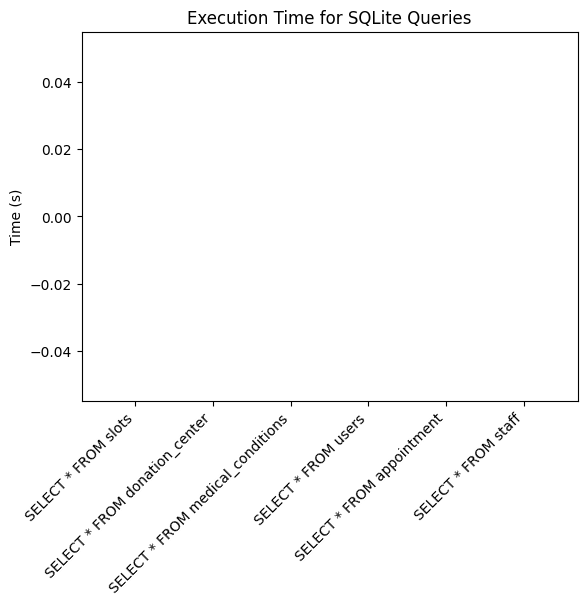

In [ ]:
#Graph visualization
import time
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def measure_query_2(query):
    start_time = time.monotonic()
    conn = sqlite3.connect('../blood_donation.db')
    cursor = conn.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(result, columns=columns)
    conn.close()
    end_time = time.monotonic()
    elapsed_time = end_time - start_time
    return {'query': query, 'time': elapsed_time, 'result': df}

queries = ['SELECT * FROM slots', 'SELECT * FROM donation_center', 'SELECT * FROM medical_conditions', 'SELECT * FROM users', 'SELECT * FROM appointment', 'SELECT * FROM staff']
results = [measure_query_2(q) for q in queries]
times = []
for r in results:
    if r['result'].empty:
        times.append(0)
    else:
        times.append(r['time'])

plt.bar(range(len(queries)), times)
plt.xticks(range(len(queries)), queries, rotation=45, ha='right')
plt.ylabel('Time (s)')
plt.title('Execution Time for SQLite Queries')
plt.show()


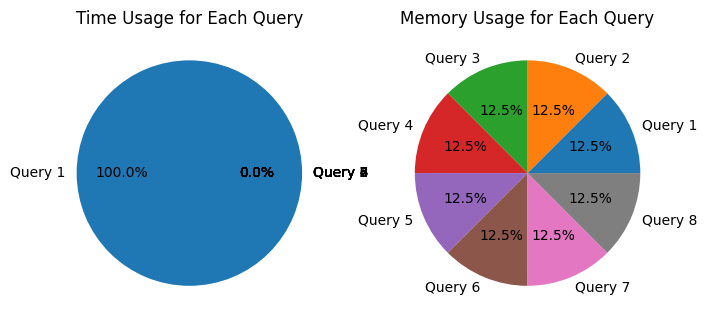

In [2]:
import sqlite3
import time
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

conn = sqlite3.connect('../blood_donation.db')

# c = conn.cursor()

def run_query(query):
    cursor = conn.execute(query)
    return cursor

# Query 1
query = "SELECT * FROM appointment JOIN donation_center ON appointment.DonationCenterID = donation_center.DonationCenterID WHERE Date = '2023-04-12' AND donation_center.Name = 'BloodBank@DhobyGhaut'"
start_time = time.time()
cursor = run_query(query)
end_time = time.time()
query_time1 = end_time - start_time
query_memory1 = memory_usage((run_query, (query,), {}), interval=0.1, max_usage=False)[0]

# Query 2
query = "SELECT * FROM donors JOIN medical_conditions ON donors.DonorMedicalHistory = medical_conditions.MedicalConditionID WHERE medical_conditions.Name = 'Asthma'"
start_time = time.time()
cursor = run_query(query)
end_time = time.time()
query_time2 = end_time - start_time
query_memory2 = memory_usage((run_query, (query,), {}), interval=0.1, max_usage=False)[0]

# Query 3
query = "SELECT * FROM appointment JOIN donation_center ON appointment.DonationCenterID = donation_center.DonationCenterID WHERE Status = 'Cancelled' AND donation_center.Name = 'BloodBank@Woodlands'"
start_time = time.time()
cursor = run_query(query)
end_time = time.time()
query_time3 = end_time - start_time
query_memory3 = memory_usage((run_query, (query,), {}), interval=0.1, max_usage=False)[0]

# Query 4
query = "SELECT * FROM appointment JOIN slots ON appointment.SlotID = slots.SlotID WHERE DonorID = 1 AND Date = '2023-04-12' AND StartTime = '11:00:00'"
start_time = time.time()
cursor = run_query(query)
end_time = time.time()
query_time4 = end_time - start_time
query_memory4 = memory_usage((run_query, (query,), {}), interval=0.1, max_usage=False)[0]

# Query 5
query = "SELECT donors.DonorName, appointment.Date, appointment.Status FROM donors JOIN appointment ON donors.DonorID = appointment.DonorID WHERE donors.BloodType = 'O+' AND appointment.Date >= DATE('now', '-1 month')"
start_time = time.time()
cursor = run_query(query)
end_time = time.time()
query_time5 = end_time - start_time
query_memory5 = memory_usage((run_query, (query,), {}), interval=0.1, max_usage=False)[0]

# Query 6
query = "SELECT donors.DonorName, donors.DonorAge, donors.BloodType FROM donors WHERE donors.DonorAge BETWEEN 18 AND 65 AND donors.BloodType = 'AB+'AND NOT EXISTS (SELECT * FROM donations WHERE donations.DonorID = donors.DonorID AND donations.DonationDate >= date('now', '-56 day'))"
start_time = time.time()
cursor = run_query(query)
end_time = time.time()
query_time6 = end_time - start_time
query_memory6 = memory_usage((run_query, (query,), {}), interval=0.1, max_usage=False)[0]

# print(f"Result for Query 6: {result}")
# print(f"Execution time: {query_time6}")
# print(f"Memory usage: {query_memory6}")


#Query 7
query = "SELECT appointment.Status, COUNT(*) as TotalAppointments FROM appointment GROUP BY appointment.Status"

start_time = time.time()
cursor = run_query(query)
end_time = time.time()
query_time7 = end_time - start_time
query_memory7 = memory_usage((run_query, (query,), {}), interval=0.1, max_usage=False)[0]

#query 8
query = "SELECT medical_conditions.Name, COUNT(*) as TotalDonors FROM donors INNER JOIN medical_conditions ON donors.DonorMedicalHistory = medical_conditions.MedicalConditionID GROUP BY medical_conditions.Name ORDER BY TotalDonors DESC LIMIT 5"

start_time = time.time()
cursor = run_query(query)
end_time = time.time()
query_time8 = end_time - start_time
query_memory8 = memory_usage((run_query, (query,), {}), interval=0.1, max_usage=False)[0]


times = [query_time1, query_time2, query_time3, query_time4, query_time5, query_time6, query_time7, query_time8]
memory = [query_memory1, query_memory2, query_memory3, query_memory4, query_memory5, query_memory6, query_memory7, query_memory8]
labels = ['Query 1', 'Query 2', 'Query 3', 'Query 4', 'Query 5', 'Query 6', 'Query 7', 'Query 8']

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].pie(times, labels=labels, autopct='%1.1f%%')
ax[0].set_title('Time Usage for Each Query')

ax[1].pie(memory, labels=labels, autopct='%1.1f%%')
ax[1].set_title('Memory Usage for Each Query')

plt.show()
# c.close()
# conn.close()